<a href="https://colab.research.google.com/github/albreyes/PE-A-09/blob/main/vector_output_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
# montamos la unidad de drive en colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [316]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [317]:
# define input sequence
#raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
raw_seq = [8161, 8600, 8813, 8996, 9660, 10149, 10583, 11143, 11694, 12422, 12940, 12975, 13134, 13514, 13548, 13958]

Text(0, 0.5, 'Demanda (GW-h)')

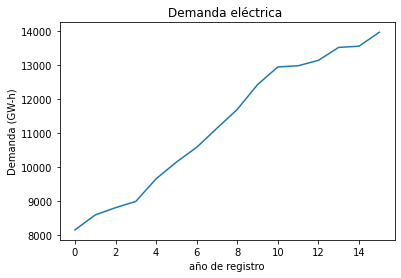

In [318]:
import matplotlib.pyplot as plt

plt.title('Demanda eléctrica ')
plt.plot(raw_seq)
plt.xlabel('año de registro')
plt.ylabel('Demanda (GW-h)')

In [319]:

# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=1050, verbose=0)


In [320]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 3, 100)            40800     
_________________________________________________________________
lstm_41 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 202       
Total params: 121,402
Trainable params: 121,402
Non-trainable params: 0
_________________________________________________________________


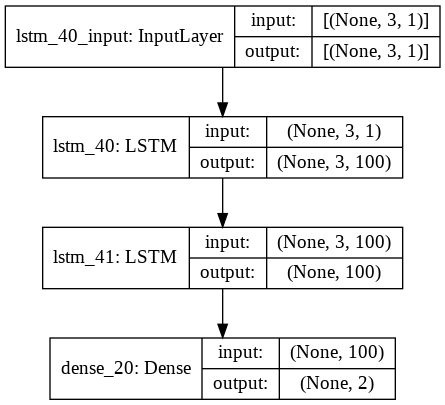

In [321]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='gdrive/My Drive/INEEL/Cubico/grupo_pronostico/datos/model_plot-output-vector.png', show_shapes=True, show_layer_names=True)

In [335]:
# demonstrate prediction
l=X.reshape((X.shape[0],X.shape[1]))
i_sample = np.random.randint(len(y))   # Tomar un ejemplo aleatorio
x_sample = l[i_sample]
x_sample = x_sample.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_sample, verbose=0)
#plt.plot(l[i_sample])
print('secuencia de entrada:',l[i_sample])
#plt.plot(yhat[0],color='green', linestyle='dashed')
print('secuencia de salida (predicha):',yhat[0])
#plt.plot(y[i_sample],color='red')
print('secuencia de salida (real):',y[i_sample])

secuencia de entrada: [11143 11694 12422]
secuencia de salida (predicha): [12496.096 12921.012]
secuencia de salida (real): [12940 12975]


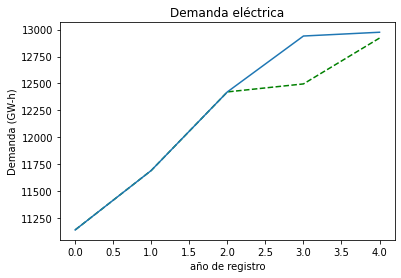

In [336]:
trama_real=np.append(l[i_sample],y[i_sample])
trama_predicha=np.append(l[i_sample],yhat[0])
plt.title('Demanda eléctrica')
plt.xlabel('año de registro')
plt.ylabel('Demanda (GW-h)')
plt.plot(trama_predicha,color='green', linestyle='dashed')
#print(trama_predicha)
plt.plot(trama_real)
#print(trama_real)

In [324]:
import numpy as np
#plt.plot(y)
#X
#n_steps=3
#n_features=1
l=X.reshape((X.shape[0],X.shape[1]))
lista_tplus1=array([])
lista_tplus2=array([])
for i in l:
    i = i.reshape((1, n_steps_in, n_features))
    yhat = model.predict(i, verbose=0)
    lista_tplus1=np.append(lista_tplus1,yhat[0][0])
    lista_tplus2=np.append(lista_tplus2,yhat[0][1])
    #print(yhat)
  
#print(lista_tplus1)
#print(lista_tplus2)

Text(0, 0.5, 'Demanda (GW-h)')

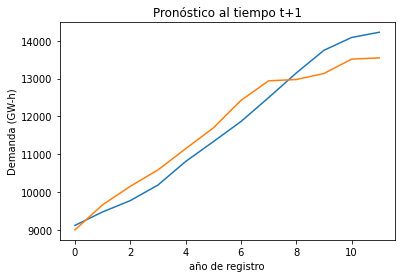

In [325]:
plt.title('Pronóstico al tiempo t+1')
plt.plot(lista_tplus1)
plt.plot(y[:,0])
plt.xlabel('año de registro')
plt.ylabel('Demanda (GW-h)')

Text(0, 0.5, 'Demanda (GW-h)')

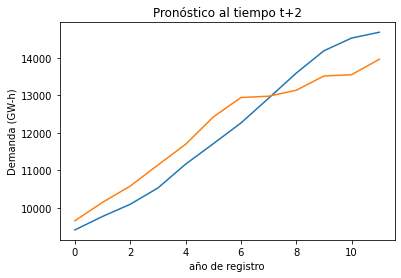

In [326]:
plt.title('Pronóstico al tiempo t+2')
plt.plot(lista_tplus2)
plt.plot(y[:,1])
plt.xlabel('año de registro')
plt.ylabel('Demanda (GW-h)')

In [327]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [328]:
mape1=mean_absolute_percentage_error(lista_tplus1, y[:,0])
mape2=mean_absolute_percentage_error(lista_tplus2, y[:,1])
print('MAPE tiempo t+1:',mape1)
print('MAPE tiempo t+2:',mape2)


MAPE tiempo t+1: 3.3589392417519632
MAPE tiempo t+2: 4.458384432186906
